# Projeto de Análise de Redes

# Explicando Dataset

## O que é
O dataset é uma rede de usuários da LastFM, uma rede social com foco em música. Foi obtido em [https://snap.stanford.edu/data/feather-lastfm-social.html](https://snap.stanford.edu/data/feather-lastfm-social.html) e é composto por 7624 nós e 27806 arestas.


## O que são os nós e arestas
Os nós são os usuários da rede e as arestas são as conexões entre eles. As conexões são feitas quando um usuário adiciona outro como amigo, de forma mútua. Ou seja, se o usuário A adiciona o usuário B como amigo, o usuário B também adiciona o usuário A como amigo.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar grafo
grafo = pd.read_csv('lastfm_asia_edges.csv')
G = nx.Graph()
G = nx.from_pandas_edgelist(grafo, create_using=nx.Graph())
# Quantidade de nós e arestas
print('Quantidade de nós: ', G.number_of_nodes())
print('Quantidade de arestas: ', G.number_of_edges())

Quantidade de nós:  7624
Quantidade de arestas:  27806


In [ ]:
# Matriz de adjacência
matriz_adj = nx.adjacency_matrix(G)
adj_coo = matriz_adj.tocoo()
plt.figure(figsize=(15,15))
plt.spy(matriz_adj, markersize=0.1)
plt.show()

# Diâmetro e periferia da rede
print('Diâmetro da rede: ', nx.diameter(G))
print('Periferia da rede: ', nx.periphery(G))

In [8]:
# Espersidade e densidade da rede
print('Espersidade da rede: ', nx.density(G))
print('Densidade da rede: ', nx.density(G))

# Assosritivdade geral da rede
print('Assosritivdade geral da rede: ', nx.degree_assortativity_coefficient(G))

Espersidade da rede:  0.0009568849118596328
Densidade da rede:  0.0009568849118596328
Assosritivdade geral da rede:  0.01707317256063152


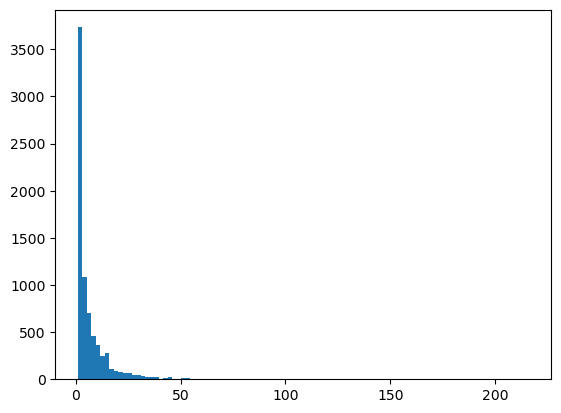

In [10]:
# Visualização do Hisograma de distribuição impírica de grau
graus = [G.degree(n) for n in G.nodes()]
plt.hist(graus, bins=100)
plt.show()

In [3]:
# Calculando valores de Eigenvector centrality, Degree centrality, Closeness centrality e Betweenness centrality
eigenvector = nx.eigenvector_centrality(G)
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
print('Eigenvector centrality: ', eigenvector)
print('Degree centrality: ', degree)
print('Closeness centrality: ', closeness)
print('Betweenness centrality: ', betweenness)

KeyboardInterrupt: 